In [1]:
lincs generate classification-problem 2 2 \
  --forbid-real-criteria --allow-integer-criteria \
  --denormalized-min-max \
  --allow-decreasing-criteria \
  --random-seed 535747649 >problem.yml
cat problem.yml

# Reproduction command (with lincs version 1.1.1.dev0): lincs generate classification-problem 2 2 --random-seed 535747649 --denormalized-min-max --allow-decreasing-criteria --forbid-real-criteria --allow-integer-criteria
kind: classification-problem
format_version: 1
criteria:
  - name: Criterion 1
    value_type: integer
    preference_direction: increasing
    min_value: -4949
    max_value: 9942
  - name: Criterion 2
    value_type: integer
    preference_direction: decreasing
    min_value: -9264
    max_value: 9236
ordered_categories:
  - name: Worst category
  - name: Best category


In [2]:
lincs describe classification-problem problem.yml

This a classification problem into 2 ordered categories named "Worst category" and "Best category".
The best category is "Best category" and the worst category is "Worst category".
There are 2 classification criteria (in no particular order).
Criterion "Criterion 1" takes integer values between -4949 and 9942 included.
Higher values of "Criterion 1" are known to be better.
Criterion "Criterion 2" takes integer values between -9264 and 9236 included.
Lower values of "Criterion 2" are known to be better.


In [3]:
lincs generate classification-model problem.yml --random-seed 86476259 >model.yml
cat model.yml

# Reproduction command (with lincs version 1.1.1.dev0): lincs generate classification-model problem.yml --random-seed 86476259 --model-type mrsort
kind: ncs-classification-model
format_version: 1
accepted_values:
  - kind: thresholds
    thresholds: [879]
  - kind: thresholds
    thresholds: [-4473]
sufficient_coalitions:
  - kind: weights
    criterion_weights: [0.0986588299, 1.07862949]


In [4]:
lincs describe classification-model problem.yml model.yml

This is a MR-Sort (a.k.a. 1-Uc-NCS) model: an NCS model where the sufficient coalitions are specified using the same criterion weights for all boundaries.
The weights associated to each criterion are:
  - Criterion "Criterion 1": 0.10
  - Criterion "Criterion 2": 1.08
To get into an upper category, an alternative must be better than the following profiles on a set of criteria whose weights add up to at least 1:
  - For category "Best category": at least 879 on criterion "Criterion 1" and at most -4473 on criterion "Criterion 2"


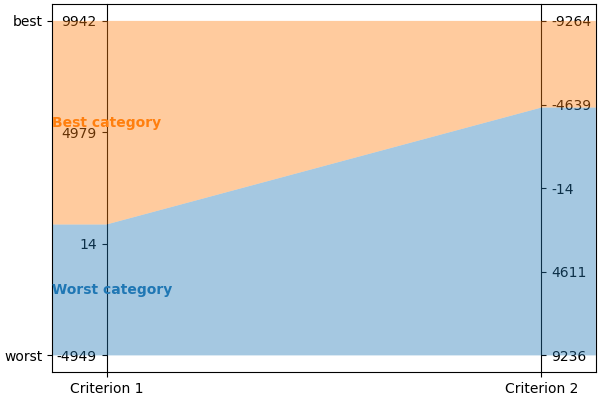

In [5]:
lincs visualize classification-model problem.yml model.yml - | display

In [6]:
lincs generate classified-alternatives problem.yml model.yml 100 --max-imbalance 0.1 --random-seed 148697048 >alternatives.csv
head -n 10 alternatives.csv

# Reproduction command (with lincs version 1.1.1.dev0): lincs generate classified-alternatives problem.yml model.yml 100 --random-seed 148697048 --max-imbalance 0.1 --misclassified-count 0
name,"Criterion 1","Criterion 2",category
"Alternative 1",9487,4222,"Worst category"
"Alternative 2",4230,-4300,"Worst category"
"Alternative 3",4052,-8926,"Best category"
"Alternative 4",5095,2812,"Worst category"
"Alternative 5",3447,5785,"Worst category"
"Alternative 6",-563,-4842,"Best category"
"Alternative 7",-1927,-3298,"Worst category"
"Alternative 8",1697,-3141,"Worst category"


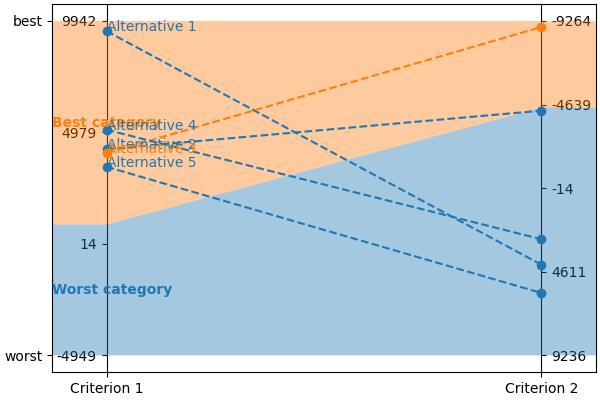

In [7]:
lincs visualize classification-model problem.yml model.yml - --alternatives alternatives.csv --alternatives-count 5 | display

In [8]:
lincs classification-accuracy problem.yml model.yml alternatives.csv

100/100


In [9]:
lincs learn classification-model problem.yml alternatives.csv --mrsort.weights-profiles-breed.accuracy-heuristic.random-seed 37425142

# Reproduction command (with lincs version 1.1.1.dev0): lincs learn classification-model problem.yml alternatives.csv --model-type mrsort --mrsort.strategy weights-profiles-breed --mrsort.weights-profiles-breed.models-count 9 --mrsort.weights-profiles-breed.accuracy-heuristic.random-seed 37425142 --mrsort.weights-profiles-breed.initialization-strategy maximize-discrimination-per-criterion --mrsort.weights-profiles-breed.weights-strategy linear-program --mrsort.weights-profiles-breed.linear-program.solver glop --mrsort.weights-profiles-breed.profiles-strategy accuracy-heuristic --mrsort.weights-profiles-breed.accuracy-heuristic.processor cpu --mrsort.weights-profiles-breed.breed-strategy reinitialize-least-accurate --mrsort.weights-profiles-breed.reinitialize-least-accurate.portion 0.5 --mrsort.weights-profiles-breed.target-accuracy 1.0
kind: ncs-classification-model
format_version: 1
accepted_values:
  - kind: thresholds
    thresholds: [4230]
  - kind: thresholds
    thresholds: [-452